In [1]:
# Import necessary libraries and modules
from tensorflow.keras.models import Sequential  # Sequential model: a linear stack of layers in Keras
from tensorflow.keras.layers import Dense, Dropout, Input  # Dense (fully connected layer), Dropout (regularization layer), and Input layer
from tensorflow.keras.optimizers import RMSprop  # RMSprop optimizer: used for training the model with adaptive learning rates
from tensorflow.keras.datasets import mnist  # MNIST dataset: a famous dataset of handwritten digits (0-9)
import matplotlib.pyplot as plt  # Matplotlib: used for plotting graphs and visualizations
import numpy as np  # NumPy: a library for numerical computing, particularly for arrays and matrices


In [2]:
# Load the OCR dataset (MNIST)
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# 'x_train' contains the training images (28x28 pixel images of handwritten digits)
# 'y_train' contains the labels for the training images (digits 0-9)
# 'x_test' contains the test images (28x28 pixel images of handwritten digits, unseen during training)
# 'y_test' contains the labels for the test images (digits 0-9 for evaluation)


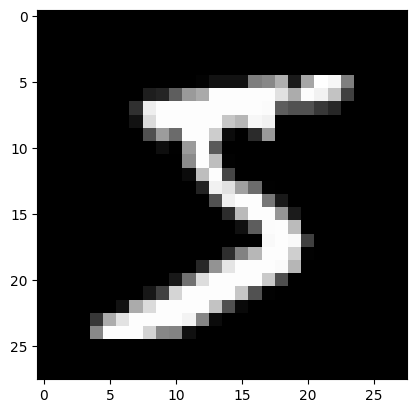

In [4]:
# Reshape the flattened image back to 28x28
image = x_train[0].reshape(28, 28)  # Reshaping the first training image (which is a 1D array of 784 values) back to a 28x28 2D array

# Display the image
plt.imshow(image, cmap='grey')  # Displaying the image using Matplotlib. 'cmap' sets the color map to grayscale
plt.show()  # Show the image plot


In [5]:
# Reshape the data to fit the model
x_train = x_train.reshape(60000, 784)  # Reshaping the training data from (60000, 28, 28) to (60000, 784)
# x_train originally has 60000 images, each 28x28 pixels, so we flatten each image to a 1D array of 784 pixels

x_test = x_test.reshape(10000, 784) 


In [6]:
# Convert class vectors to binary class matrices
num_classes = 10  # Define the number of classes (for MNIST, there are 10 classes: digits 0-9)

# Convert the labels into binary class matrices (one-hot encoding)
y_train = np.eye(num_classes)[y_train]  # For each label in y_train, create a binary vector where the position of the digit is 1, and others are 0
y_test = np.eye(num_classes)[y_test]    # Similarly, convert y_test labels to one-hot encoded binary vectors


In [7]:
# Define the model architecture
model = Sequential()  # Initialize a sequential model, which means layers are stacked one after the other

model.add(Input(shape=(784,)))  # Define the input layer with 784 units (for each pixel in the 28x28 MNIST images)
# The input shape is (784,) because each image has been flattened into a 1D array of 784 pixels

model.add(Dense(512, activation='relu'))  # Add a dense layer with 512 neurons and ReLU activation function
# Dense layer is a fully connected layer, meaning each neuron in this layer is connected to all the neurons in the previous layer

model.add(Dropout(0.2))  # Add a dropout layer to prevent overfitting. 20% of the neurons will be randomly turned off during training

model.add(Dense(512, activation='relu'))  # Add another dense layer with 512 neurons and ReLU activation

model.add(Dropout(0.2))  # Add another dropout layer with 20% dropout rate

model.add(Dense(num_classes, activation='softmax'))  # Add the output layer with 'num_classes' neurons (10 for MNIST)
# 'softmax' activation is used for multi-class classification, where it converts raw output values (logits) into probabilities
# Each output neuron represents the probability of the input belonging to a specific class (0-9 for MNIST)


In [8]:
# Compile the model
model.compile(loss='categorical_crossentropy',  # Define the loss function. 'categorical_crossentropy' is used for multi-class classification.
              optimizer=RMSprop(),  # Use the RMSprop optimizer, which is well-suited for training deep neural networks.
              metrics=['accuracy'])  # Track accuracy during training as an evaluation metric.


In [9]:
# Train the model
batch_size = 128
epochs = 5
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7950 - loss: 13.4677 - val_accuracy: 0.9281 - val_loss: 0.3259
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8991 - loss: 0.5688 - val_accuracy: 0.9384 - val_loss: 0.2451
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9186 - loss: 0.4229 - val_accuracy: 0.9372 - val_loss: 0.2810
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9325 - loss: 0.3449 - val_accuracy: 0.9594 - val_loss: 0.1796
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9390 - loss: 0.3225 - val_accuracy: 0.9477 - val_loss: 0.2762


In [10]:
# Evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)  # Evaluate the trained model on the test data (x_test and y_test)
# The 'evaluate' function computes the loss and any metrics defined during compilation (in this case, accuracy)

print('Test loss:', score[0])  # The first element of 'score' is the test loss
print('Test accuracy:', score[1])  # The second element of 'score' is the test accuracy


Test loss: 0.27623456716537476
Test accuracy: 0.947700023651123
